In [55]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [56]:
labor = pd.read_csv('Labor_wmn.csv')
labor

,observation_date,LNS11300002
0,1948-01-01,32.0
1,1948-02-01,32.4
2,1948-03-01,32.1
3,1948-04-01,33.0
4,1948-05-01,32.0
...,...,...
931,2025-08-01,57.0
932,2025-09-01,57.4
933,2025-10-01,NaN
934,2025-11-01,57.4


In [57]:
fertility = pd.read_csv('fertility.csv')
fertility

,observation_date,SPDYNTFRTINUSA
0,1960-01-01,3.6540
1,1961-01-01,3.6200
2,1962-01-01,3.4610
3,1963-01-01,3.3190
4,1964-01-01,3.1900
...,...,...
59,2019-01-01,1.7060
60,2020-01-01,1.6415
61,2021-01-01,1.6640
62,2022-01-01,1.6565


In [58]:
df = pd.merge(fertility, labor)
df

,observation_date,SPDYNTFRTINUSA,LNS11300002
0,1960-01-01,3.6540,37.0
1,1961-01-01,3.6200,38.2
2,1962-01-01,3.4610,37.9
3,1963-01-01,3.3190,38.0
4,1964-01-01,3.1900,38.4
...,...,...,...
59,2019-01-01,1.7060,57.5
60,2020-01-01,1.6415,57.8
61,2021-01-01,1.6640,55.7
62,2022-01-01,1.6565,56.8


In [59]:
df['year'] = df['observation_date'].str[:4].astype(int)
df.drop(columns = 'observation_date')

,SPDYNTFRTINUSA,LNS11300002,year
0,3.6540,37.0,1960
1,3.6200,38.2,1961
2,3.4610,37.9,1962
3,3.3190,38.0,1963
4,3.1900,38.4,1964
...,...,...,...
59,1.7060,57.5,2019
60,1.6415,57.8,2020
61,1.6640,55.7,2021
62,1.6565,56.8,2022


In [60]:
ax.plot(df['year'], df['SPDYNTFRTINUSA'], label='Fertility Rate', marker='o') 
ax.plot(df['year'], df['LNS11300002'], label='Labor Force Participation Rate - Women', linestyle='--') 

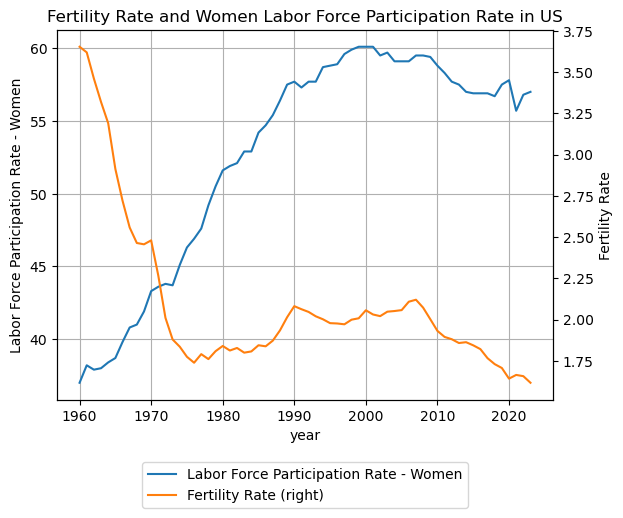

In [61]:
ax = df.plot(
    x='year',
    y='LNS11300002',
    label='Labor Force Participation Rate - Women'
)

df.plot(
    x='year',
    y='SPDYNTFRTINUSA',
    secondary_y=True,
    ax=ax,
    label='Fertility Rate'
)

ax.set_ylabel('Labor Force Participation Rate - Women')
ax.right_ax.set_ylabel('Fertility Rate')

ax.set_title('Fertility Rate and Women Labor Force Participation Rate in US')
ax.grid(True)

# Combine legends from both axes
lines_1, labels_1 = ax.get_legend_handles_labels()
lines_2, labels_2 = ax.right_ax.get_legend_handles_labels()
ax.legend(lines_1 + lines_2, labels_1 + labels_2)
ax.legend(lines_1 + lines_2, labels_1 + labels_2,loc='upper center', bbox_to_anchor=(0.5, -0.15))

plt.show()